# INF 280 - Evluación Tema 1
### Nicolás Acevedo
### 201573512-3


In [2]:
!wget https://raw.githubusercontent.com/FMena14/ML_usm/master/Estadisticia/T1_data/daily_sales_week.csv
!wget https://raw.githubusercontent.com/FMena14/ML_usm/master/Estadisticia/T1_data/daily_sales_weekend.csv

--2020-04-24 20:53:59--  https://raw.githubusercontent.com/FMena14/ML_usm/master/Estadisticia/T1_data/daily_sales_week.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 558 [text/plain]
Saving to: ‘daily_sales_week.csv’

daily_sales_week.cs 100%[===================>]     558  --.-KB/s    in 0s      

2020-04-24 20:53:59 (109 MB/s) - ‘daily_sales_week.csv’ saved [558/558]

--2020-04-24 20:54:00--  https://raw.githubusercontent.com/FMena14/ML_usm/master/Estadisticia/T1_data/daily_sales_weekend.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Len

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

ventasSem = pd.read_csv("daily_sales_week.csv", names=['Ventas'])
ventasFds = pd.read_csv("daily_sales_weekend.csv", names=['Ventas'])

print(ventasSem)
print(ventasFds)

     Ventas
0         0
1        18
2         6
3         4
4        30
..      ...
256       6
257       2
258       1
259       1
260       2

[261 rows x 1 columns]
     Ventas
0        23
1        13
2         7
3        13
4        17
..      ...
99       21
100      13
101      17
102      21
103      14

[104 rows x 1 columns]


a) La **población** a estudiar corresponde al número total de ventas de la empresa durante el transcurso del año 2019.

La **variable** a estudiar corresponde a la cantidad de ventas realizadas en el día.

Tenemos dos **muestras** disponibles: la cantidad de *ventas durante los días de semana*, y la cantidad de *ventas durante los días de fin de semana*, ya que presentan comportamientos diferentes.

El **dataset** de cada muestra corresponde a la cantidad de ventas realizadas en dicha jornada laboral.

In [52]:
def mediaMuestral(datos):
  n = datos.size

  suma = 0
  for index, row in datos.iterrows():
    suma += row['Ventas']
  return round(suma/n, 2)

def medianaMuestral(datos):
  n = datos.size
  
  datosOrdenados = []
  for index, row in datos.iterrows():
    datosOrdenados.append(row['Ventas'])
  datosOrdenados.sort()

  if(n%2 == 0):
    return (datosOrdenados[int((n/2)-1)] + datosOrdenados[int(n/2)])/2
  
  else:
    return (datosOrdenados[int(n/2)])

def sesgo(datos):
  return round(mediaMuestral(datos) - medianaMuestral(datos), 2)

mediaSem = mediaMuestral(ventasSem)
mediaFds = mediaMuestral(ventasFds)

medianaSem = medianaMuestral(ventasSem)
medianaFds = medianaMuestral(ventasFds)

sesgoSem = sesgo(ventasSem)
sesgoFds = sesgo(ventasFds)

print("Media Muestral (Promedio) ventas Semana: ", mediaSem)
print("Media Muestral (Promedio) ventas Fin de Semana: ", mediaFds)
print("")
print("Mediana ventas Semana: ", medianaSem)
print("Mediana ventas Fin de Semana: ",medianaFds)
print("")
print("Sesgo ventas Semana: ", sesgoSem)
print("Sesgo ventas Fin de Semana: ", sesgoFds)

Media Muestral (Promedio) ventas Semana:  4.59
Media Muestral (Promedio) ventas Fin de Semana:  14.73

Mediana ventas Semana:  3
Mediana ventas Fin de Semana:  14.0

Sesgo ventas Semana:  1.59
Sesgo ventas Fin de Semana:  0.73


b) Con respecto a la **Media Muestral** o **Promedio** de las ventas, es razonable que sea mayor en los días de fin de semana, ya que es cuando típicamente la gente más se dedica a salir de compras.

Respecto de la **Mediana** de las ventas, también hace bastante sentido con los resultados obtenidos, ya que, por ejemplo para los días de semana, que el valor sea tan bajo significa que existe una tendencia a una baja cantidad de ventas diarias.
Por otro lado, para los fines de semana, existe una tendencia un poco más cercana al promedio de las ventas.

El **Sesgo** es positivo para ambos casos, lo que indica que el promedio de ventas es mayor que la media de ventas en ambas situaciones.

In [54]:
def desviacionEstandar(datos):
  suma = 0
  n = datos.size
  media = mediaMuestral(datos)

  for index, row in datos.iterrows():
    suma += (row['Ventas'] - media)**2

  return round(math.sqrt(suma/(n-1)),2)

desvSem = desviacionEstandar(ventasSem)
desvFds = desviacionEstandar(ventasFds)

print("Desviación Estándar días de Semana: ", desvSem)
print("Desviación Estándar días de Fin de Semana: ", desvFds)

Desviación Estándar días de Semana:  5.21
Desviación Estándar días de Fin de Semana:  5.27


c) La **desviación estándar** para ambos casos es bastante similar. Podría considerarse un número no muy grande, por ende, esto significa que los datos se encuentran más "agrupados" alrededor de la media aritmética. En otras palabras, la dispersión de los datos es más o menos baja, lo cual indica que están más cerca del valor promedio de las ventas.

Esto se puede interpretar como que la empresa de zapatillas mantiene un ritmo constante de ventas, tanto para los días de semana como para los fines de semana, sin tener valores muy disparados hacia ningún extremo, por ende, no es común que un día las ventas sean ni demasiado bajas, ni demasiado altas.

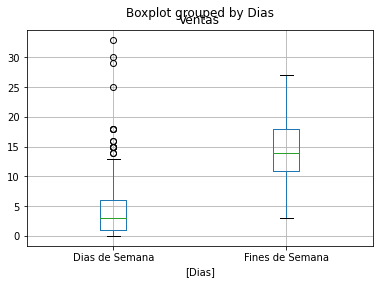

In [55]:
ventasSem["Dias"] = "Dias de Semana"
ventasFds["Dias"] = "Fines de Semana"

juntos = pd.concat([ventasSem, ventasFds])

juntos.boxplot(by="Dias")

d) Efectivamente, existe evidencia para decir que los fines de semana se vende más que los días de semana, ya que el 100% de los datos de ventas durante el fin de semana está por sobre el 50% de los datos de ventas durante la semana.

Si un día exitoso se considera con al menos 15 ventas, puede verse que en la semana los días de este tipo son tan escasos que corresponden a valores outliers, es decir, casi la totalidad de los datos se encuentra bajo este umbral.

Por otro lado, durante los fines de semana, puede observarse que al menos 50% de los días es considerado exitoso bajo este criterio.

e) Observando los gráficos y en base a lo analizado en ellos, recomendaría invertir en los *días de semana*, ya que hay muy pocos días exitosos, y un poco menos del 75% de los días hacen alrededor de 5 ventas al día. Además, el promedio de las ventas es muy bajo.

Por último, cabe señalar que los días exitosos son muy poco fercuentes, por ello es recomendable aumentarlos con el marketing y la nueva estrategia de mercado.

In [56]:
ventasTemp = juntos
print(ventasTemp)

     Ventas             Dias
0         0   Dias de Semana
1        18   Dias de Semana
2         6   Dias de Semana
3         4   Dias de Semana
4        30   Dias de Semana
..      ...              ...
99       21  Fines de Semana
100      13  Fines de Semana
101      17  Fines de Semana
102      21  Fines de Semana
103      14  Fines de Semana

[365 rows x 2 columns]


Media de la muestra:  Ventas    7.48
dtype: float64
Mediana muestral:  Ventas    5.0
dtype: float64


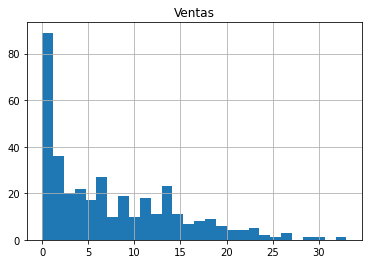

In [64]:
def k(datos):
  n = datos.size
  return math.ceil(math.sqrt(n))

Ka = k(ventasTemp)

hist = ventasTemp.hist(column='Ventas', bins=Ka)

mediaTemp = round(ventasTemp.mean(numeric_only=True), 2)
medianaTemp = round(ventasTemp.median(numeric_only=True), 2)

print("Media de la muestra: ", mediaTemp)
print("Mediana muestral: ", medianaTemp)

f) Al juntar los valores de las ventas de la semana con las de los días de semana, obtenemos una muestra mucho más grande de datos, correspondiente a la cantidad total de ventas por día durante el 2019.

Para elaborar el histograma adjunto, se utilizó un valor de $K=\lceil\sqrt{n}\rceil$, ya que es una medida consistente y frecuentemente utilizada.

In [61]:
mediaDeMedias = round((mediaSem + mediaFds)/2, 2)
print("Promedio de los promedios: ",mediaDeMedias)

mediaDeMedianas = round((medianaSem + medianaFds)/2, 2)
print("Promedio de las medianas: ", mediaDeMedianas)

Promedio de los promedios:  9.66
Promedio de las medianas:  8.5


Puede comprobarse que la media muestral y la mediana de la nueva muestra no se corresponden a un promedio entre las medidas de tendencia y dispersión de las muestras por separado.

In [73]:
nVentasSem = len(ventasSem.index)
nVentasFds = len(ventasFds.index)

m = (mediaSem*nVentasSem + mediaFds*nVentasFds) / (nVentasSem + nVentasFds)
print(round(m, 2))

7.48


Una forma de obtener la media muestral de toda la temporada usando las medias muestrales de las muestras por separado es posible gracias a un despeje matemático básico, donde necesitamos también el total de datos de cada muestra:

$$
\overline{X}_{temp} = \frac{\overline{X}_{sem}*N_{sem} + \overline{X}_{fin}*N_{fin}}{N_{sem}+N_{fin}}
$$